In [1]:
# import libraries

import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

import pandas as pd
import seaborn as sns

In [2]:
ad_train = pd.read_csv('advertising.csv')
ad_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
ad_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

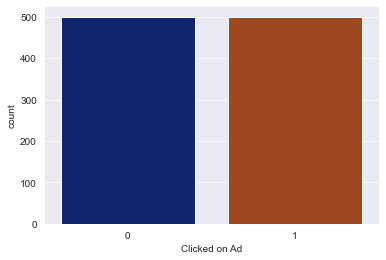

In [4]:
sns.set_style('darkgrid')

sns.countplot(x = 'Clicked on Ad', data = ad_train, palette = 'dark')

In [5]:
ad_train['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

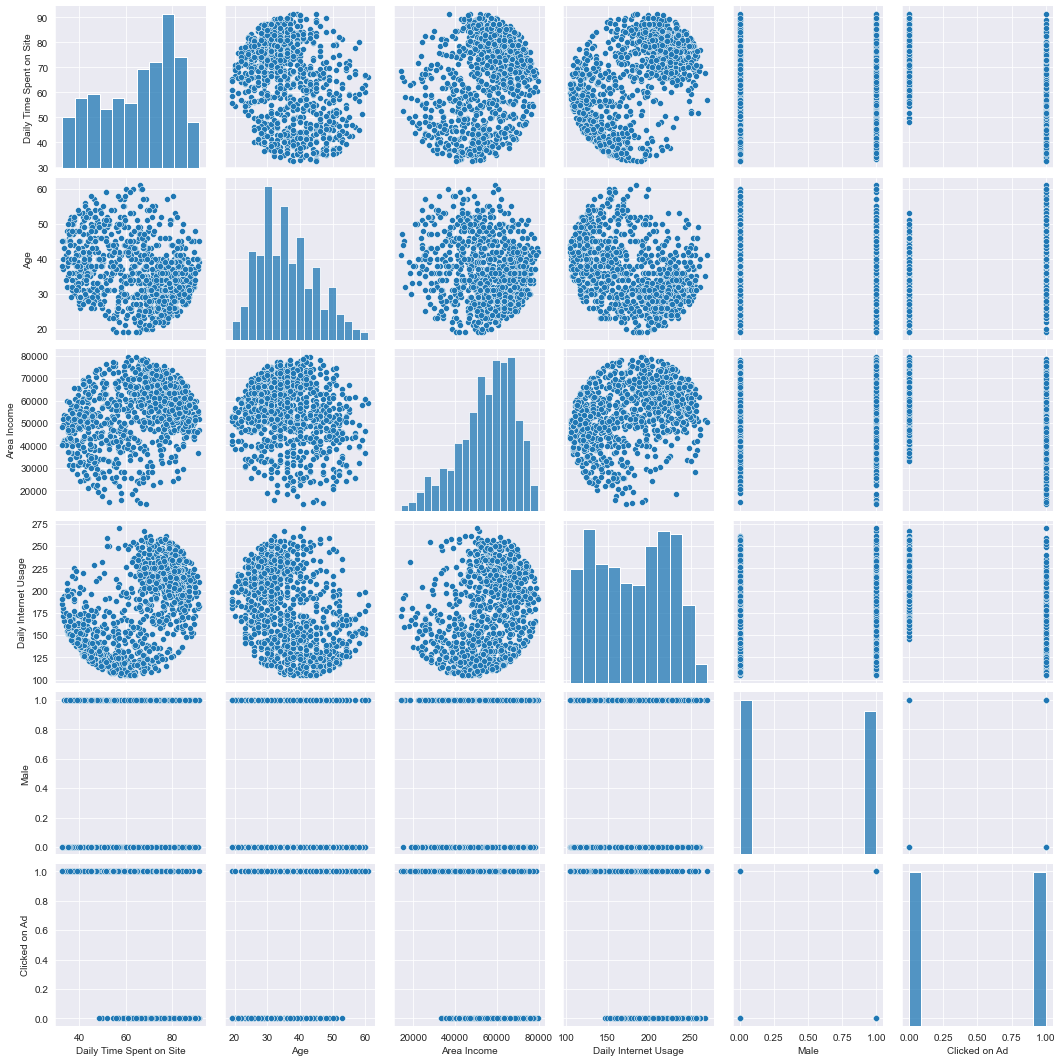

In [6]:
sns.pairplot(ad_train)

<AxesSubplot:xlabel='Clicked on Ad', ylabel='Daily Time Spent on Site'>

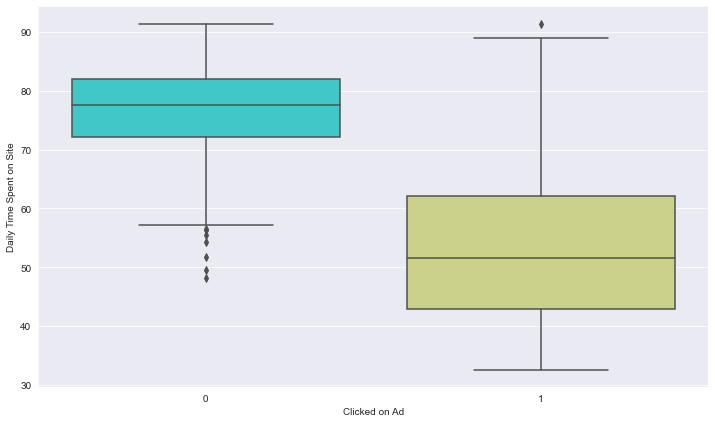

In [7]:
plt.figure(figsize = (12,7))

sns.boxplot(x = 'Clicked on Ad', y = 'Daily Time Spent on Site', data = ad_train, palette = 'rainbow')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

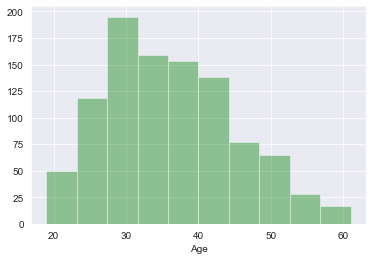

In [8]:
sns.distplot(ad_train['Age'].dropna(), kde = False, color = 'green', bins=10)

<AxesSubplot:xlabel='Clicked on Ad', ylabel='Age'>

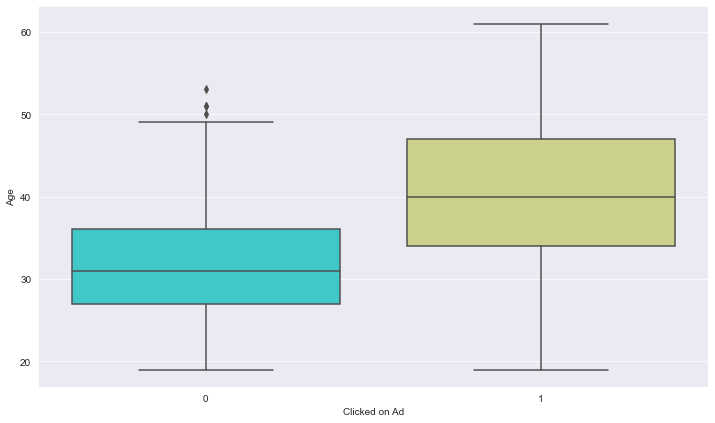

In [9]:
plt.figure(figsize = (12,7))

sns.boxplot(x = 'Clicked on Ad', y = 'Age', data = ad_train, palette = 'rainbow')

<AxesSubplot:xlabel='Clicked on Ad', ylabel='Area Income'>

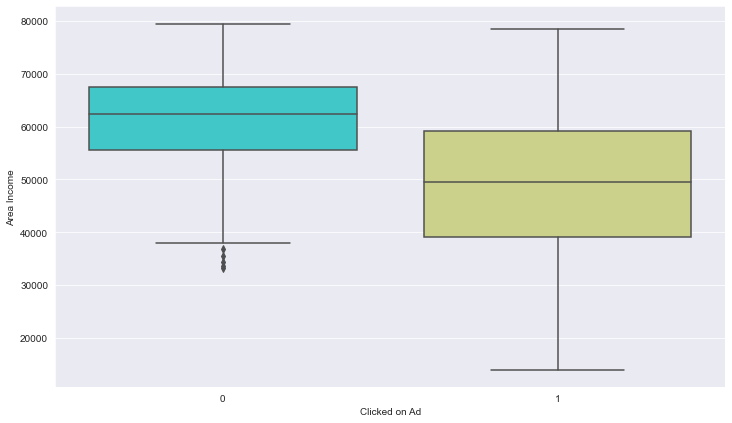

In [10]:
plt.figure(figsize = (12,7))

sns.boxplot(x = 'Clicked on Ad', y = 'Area Income', data = ad_train, palette = 'rainbow')

<AxesSubplot:xlabel='Clicked on Ad', ylabel='Daily Internet Usage'>

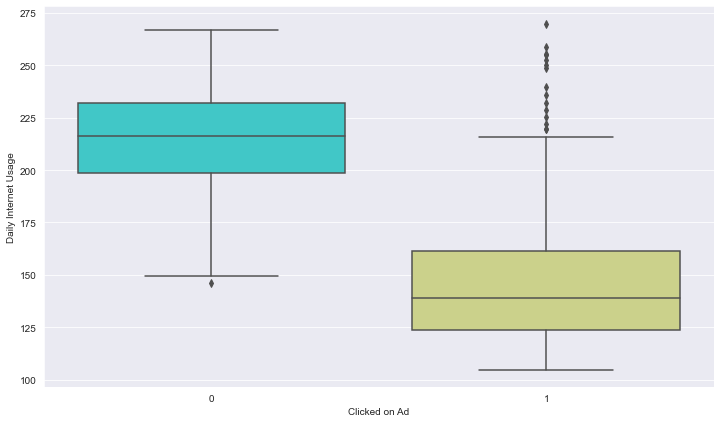

In [11]:
plt.figure(figsize = (12,7))

sns.boxplot(x = 'Clicked on Ad', y = 'Daily Internet Usage', data = ad_train, palette = 'rainbow')

<AxesSubplot:xlabel='Male', ylabel='Daily Time Spent on Site'>

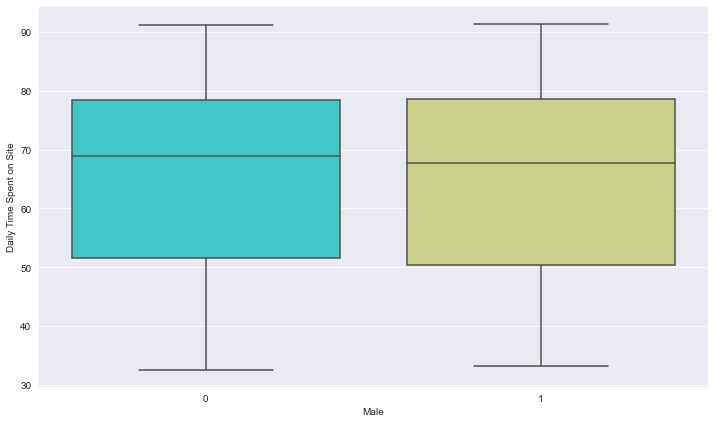

In [12]:
plt.figure(figsize = (12,7))

sns.boxplot(x = 'Male', y = 'Daily Time Spent on Site', data = ad_train, palette = 'rainbow')

<AxesSubplot:xlabel='Male', ylabel='Daily Internet Usage'>

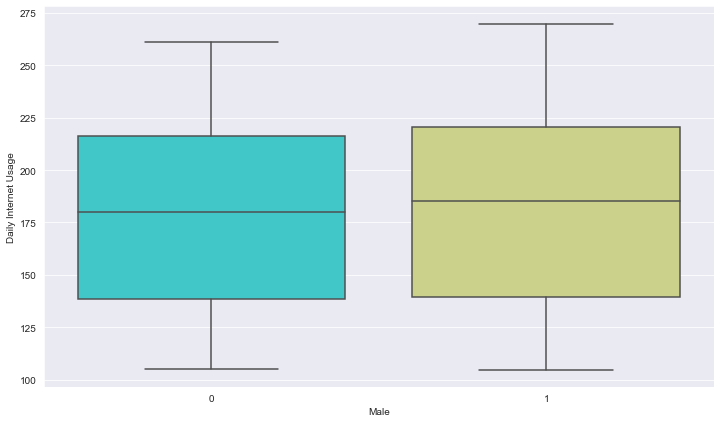

In [13]:
plt.figure(figsize = (12,7))

sns.boxplot(x = 'Male', y = 'Daily Internet Usage', data = ad_train, palette = 'rainbow')

<AxesSubplot:xlabel='Clicked on Ad', ylabel='Daily Internet Usage'>

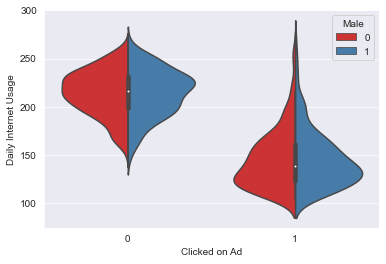

In [14]:
sns.violinplot(x='Clicked on Ad', y='Daily Internet Usage', hue='Male', data=ad_train, split=True, palette='Set1')

In [15]:
ad_train['AgePerUsage'] = ad_train['Age']/ad_train['Daily Internet Usage']
ad_train['AgePerInc'] = ad_train['Age']/ad_train['Area Income']
ad_train['AgePerSite'] = ad_train['Age']/ad_train['Daily Time Spent on Site']
ad_train['RatioUsage'] = (ad_train['Age']/ad_train['Daily Internet Usage']) * (ad_train['Daily Time Spent on Site'])

In [16]:
ad_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
 10  AgePerUsage               1000 non-null   float64
 11  AgePerInc                 1000 non-null   float64
 12  AgePerSite                1000 non-null   float64
 13  RatioUsage                1000 non-null   float64
dtypes: float6

In [17]:
ad_train.head(50)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,AgePerUsage,AgePerInc,AgePerSite,RatioUsage
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0.136671,0.000566,0.507614,9.423445
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0.159983,0.000453,0.386389,12.835475
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0.109937,0.000435,0.374262,7.637294
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0.117939,0.000529,0.391099,8.745171
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0.155156,0.000474,0.511920,10.607988
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0,0.101438,0.000385,0.383397,6.085252
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0,0.158380,0.000613,0.371162,14.081542
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1,0.364299,0.001952,0.727273,24.043716
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0,0.135434,0.000436,0.402522,10.093901
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0,0.108802,0.000359,0.286205,7.603090


In [18]:
ad_train =  ad_train.drop(['Ad Topic Line','Timestamp','City', 'Country'], axis = 1)
ad_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,AgePerUsage,AgePerInc,AgePerSite,RatioUsage
0,68.95,35,61833.90,256.09,0,0,0.136671,0.000566,0.507614,9.423445
1,80.23,31,68441.85,193.77,1,0,0.159983,0.000453,0.386389,12.835475
2,69.47,26,59785.94,236.50,0,0,0.109937,0.000435,0.374262,7.637294
3,74.15,29,54806.18,245.89,1,0,0.117939,0.000529,0.391099,8.745171
4,68.37,35,73889.99,225.58,0,0,0.155156,0.000474,0.511920,10.607988
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,0.143830,0.000420,0.411128,10.495254
996,51.30,45,67782.17,134.42,1,1,0.334772,0.000664,0.877193,17.173784
997,51.63,51,42415.72,120.37,1,1,0.423694,0.001202,0.987798,21.875301
998,55.55,19,41920.79,187.95,0,0,0.101091,0.000453,0.342034,5.615589


In [19]:
ad_train['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

In [20]:
y = ad_train['Clicked on Ad']

In [21]:
X = ad_train[['Daily Time Spent on Site','Daily Internet Usage','Area Income','AgePerUsage','RatioUsage','AgePerInc','AgePerSite']]

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log = LogisticRegression(n_jobs = 1, fit_intercept = False)
log.fit(X_train, y_train)

LogisticRegression(fit_intercept=False, n_jobs=1)

In [25]:
X_train.size

4900

In [26]:
X_test.size

2100

In [27]:
predictions = log.predict(X_test)
predictions

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0], d

In [28]:
predictions.size

300

In [29]:
X_test['prediction_value'] = predictions

<ipython-input-29-e12451d933d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['prediction_value'] = predictions


In [30]:
X_test.head()

,Daily Time Spent on Site,Daily Internet Usage,Area Income,AgePerUsage,RatioUsage,AgePerInc,AgePerSite,prediction_value
521,63.26,120.46,54787.37,0.240744,15.229454,0.000529,0.458426,1
737,71.23,122.59,41521.28,0.424178,30.214210,0.001252,0.730029,1
740,43.63,135.25,61757.12,0.280961,12.258336,0.000615,0.870960,1
660,42.04,182.11,67323.00,0.269068,11.311625,0.000728,1.165557,1
411,78.68,208.05,66225.72,0.139390,10.967171,0.000438,0.368582,0


In [42]:
X_test['Actual value'] = y_test
X_test.head(150)

<ipython-input-42-608dcbaee90f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Actual value'] = y_test


,Daily Time Spent on Site,Daily Internet Usage,Area Income,AgePerUsage,RatioUsage,AgePerInc,AgePerSite,prediction_value,Actual value
521,63.26,120.46,54787.37,0.240744,15.229454,0.000529,0.458426,1,1
737,71.23,122.59,41521.28,0.424178,30.214210,0.001252,0.730029,1,1
740,43.63,135.25,61757.12,0.280961,12.258336,0.000615,0.870960,1,1
660,42.04,182.11,67323.00,0.269068,11.311625,0.000728,1.165557,1,1
411,78.68,208.05,66225.72,0.139390,10.967171,0.000438,0.368582,0,0
...,...,...,...,...,...,...,...,...,...
914,41.86,128.62,53041.77,0.303219,12.692738,0.000735,0.931677,1,1
810,43.16,143.04,50666.50,0.202740,8.750280,0.000572,0.671918,1,1
244,70.44,178.75,65280.16,0.134266,9.457678,0.000368,0.340716,0,0
822,73.21,252.60,51013.37,0.118765,8.694774,0.000588,0.409780,0,1


In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
print(confusion_matrix(y_test, predictions))

[[140   6]
 [ 21 133]]


In [34]:
from sklearn.metrics import classification_report

In [35]:

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       146
           1       0.96      0.86      0.91       154

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [36]:
test_accuracy = accuracy_score(y_test, predictions)
print(test_accuracy)

0.91


In [37]:
predictions = log.predict(X_train)
predictions.size

700

In [38]:
train_accuracy = accuracy_score(y_train, predictions)
print(train_accuracy)

0.9157142857142857
